#### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [2]:
df = pd.read_csv('datasets/saheart.csv')

df=df.replace("Absent",0)
df=df.replace("Present",1)

In [3]:
df.head(5)

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sbp        462 non-null    int64  
 1   Tobacco    462 non-null    float64
 2   Ldl        462 non-null    float64
 3   Adiposity  462 non-null    float64
 4   Famhist    462 non-null    int64  
 5   Typea      462 non-null    int64  
 6   Obesity    462 non-null    float64
 7   Alcohol    462 non-null    float64
 8   Age        462 non-null    int64  
 9   Chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

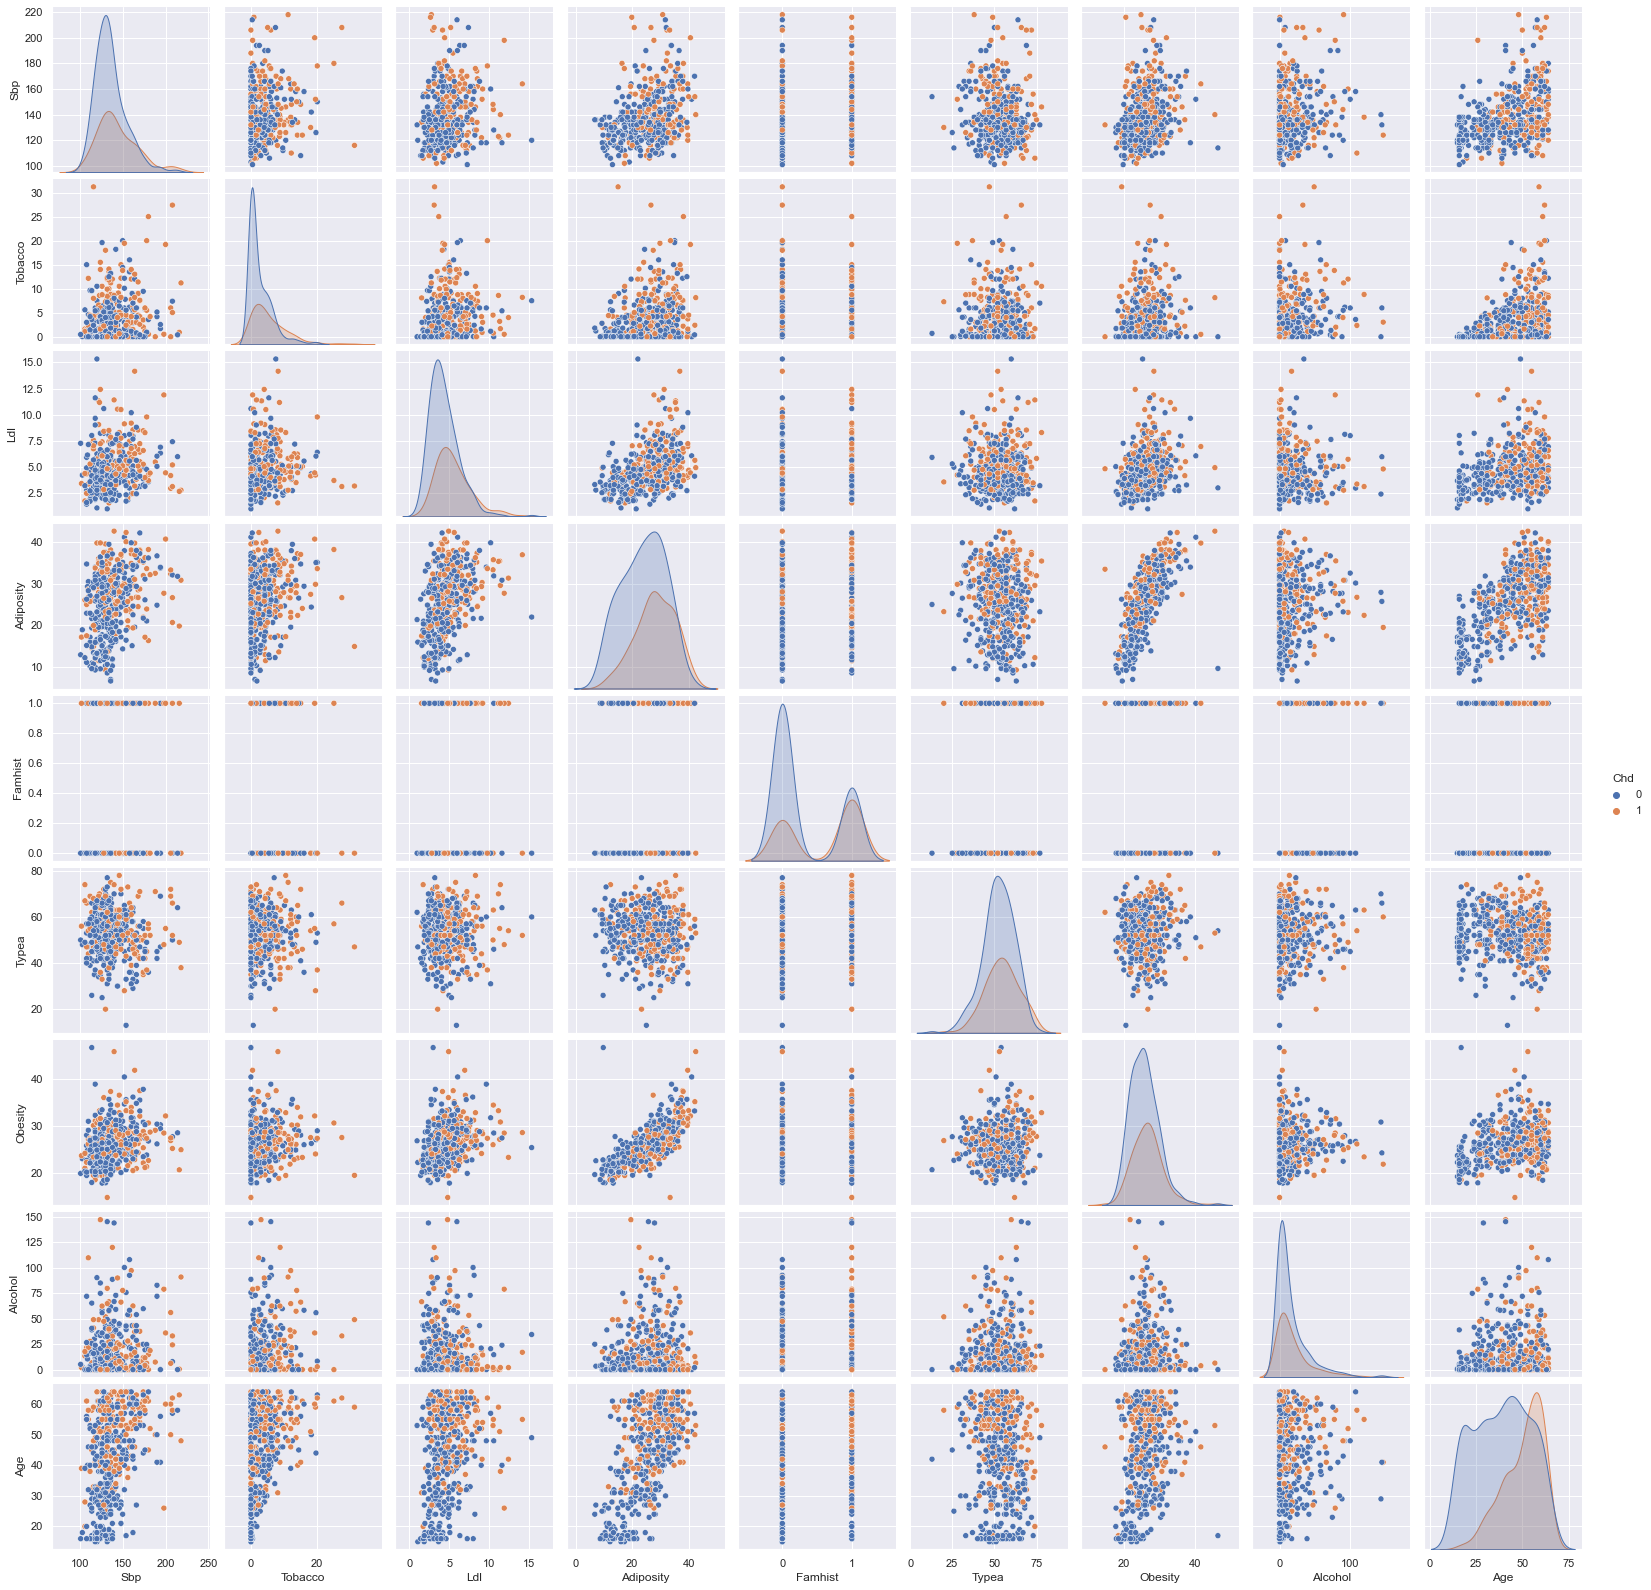

In [5]:
sns.pairplot(df, hue='Chd')
plt.show()

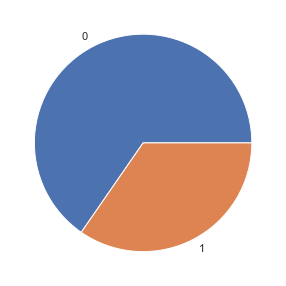

In [6]:
y =df['Chd']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [7]:
X = df.drop(columns=['Chd'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sbp,462.0,138.326840,20.496317,101.00,124.0000,134.000,148.0000,218.00
Tobacco,462.0,3.635649,4.593024,0.00,0.0525,2.000,5.5000,31.20
Ldl,462.0,4.740325,2.070909,0.98,3.2825,4.340,5.7900,15.33
Adiposity,462.0,25.406732,7.780699,6.74,19.7750,26.115,31.2275,42.49
Famhist,462.0,0.415584,0.493357,0.00,0.0000,0.000,1.0000,1.00
Typea,462.0,53.103896,9.817534,13.00,47.0000,53.000,60.0000,78.00
Obesity,462.0,26.044113,4.213680,14.70,22.9850,25.805,28.4975,46.58
Alcohol,462.0,17.044394,24.481059,0.00,0.5100,7.510,23.8925,147.19
Age,462.0,42.816017,14.608956,15.00,31.0000,45.000,55.0000,64.00


#### Standardize the Data

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sbp,462.0,-1.384174e-16,1.001084,-1.823123,-0.699754,-0.211332,0.472458,3.891408
Tobacco,462.0,-2.210834e-17,1.001084,-0.792417,-0.780974,-0.356502,0.406349,6.007857
Ldl,462.0,3.421986e-16,1.001084,-1.817753,-0.704717,-0.193518,0.507416,5.119082
Adiposity,462.0,1.807116e-16,1.001084,-2.401708,-0.724593,0.091128,0.748915,2.197976
Famhist,462.0,-4.613914e-17,1.001084,-0.843274,-0.843274,-0.843274,1.185854,1.185854
Typea,462.0,-9.227828e-17,1.001084,-4.089354,-0.622408,-0.010594,0.703189,2.538631
Obesity,462.0,5.978863e-16,1.001084,-2.695129,-0.726782,-0.056808,0.582875,4.878906
Alcohol,462.0,2.153160e-16,1.001084,-0.696983,-0.676128,-0.389882,0.280034,5.321938
Age,462.0,-9.612321e-18,1.001084,-1.906103,-0.809697,0.149658,0.834912,1.451640


#### Observations and Variables

In [9]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

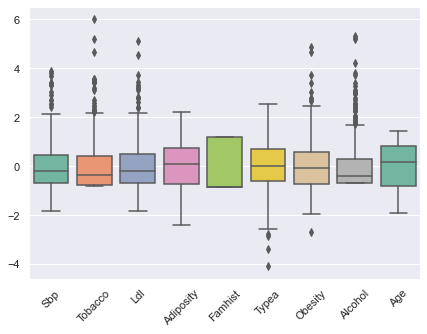

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

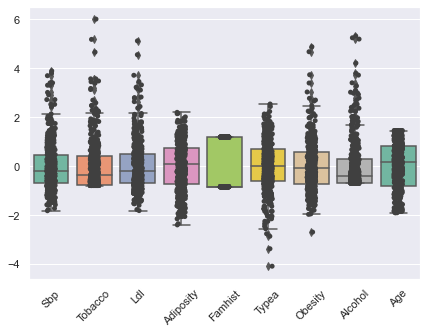

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

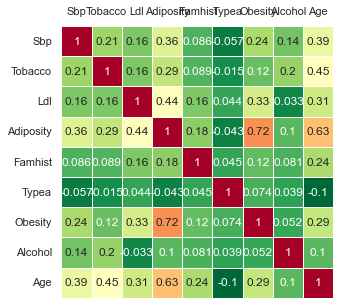

In [12]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [13]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [14]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.755799,3.059801,1.499958,-0.290872,-0.633624,-0.728449,1.121949,0.610925
1,0.674035,-0.700048,-0.696451,0.709254,0.022606,0.556312,-0.480933,-1.245368
2,0.261235,-1.042777,0.060806,-0.947377,-0.858954,-0.472695,-1.340213,-0.402731
3,3.180125,0.025987,0.016250,-0.283897,-0.551774,0.450693,-0.105512,0.530392
4,1.152951,1.891110,1.804756,-0.413231,0.479656,-0.680376,-0.816154,0.518507
...,...,...,...,...,...,...,...,...
457,2.041861,-0.529343,-0.417982,1.521906,-0.233235,3.321603,0.927410,-0.353265
458,1.499125,0.411675,-0.733227,1.341011,-0.377017,1.382735,0.095119,0.025949
459,-1.982130,1.687897,-1.055382,-0.292846,0.250739,-0.980429,-0.643316,-1.338383
460,1.146393,-1.718415,0.867501,0.564927,1.544199,-1.526034,2.166484,-0.070176


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'8 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (32.0% expl.var)', ylabel='PC2 (13.3% expl.var)'>)

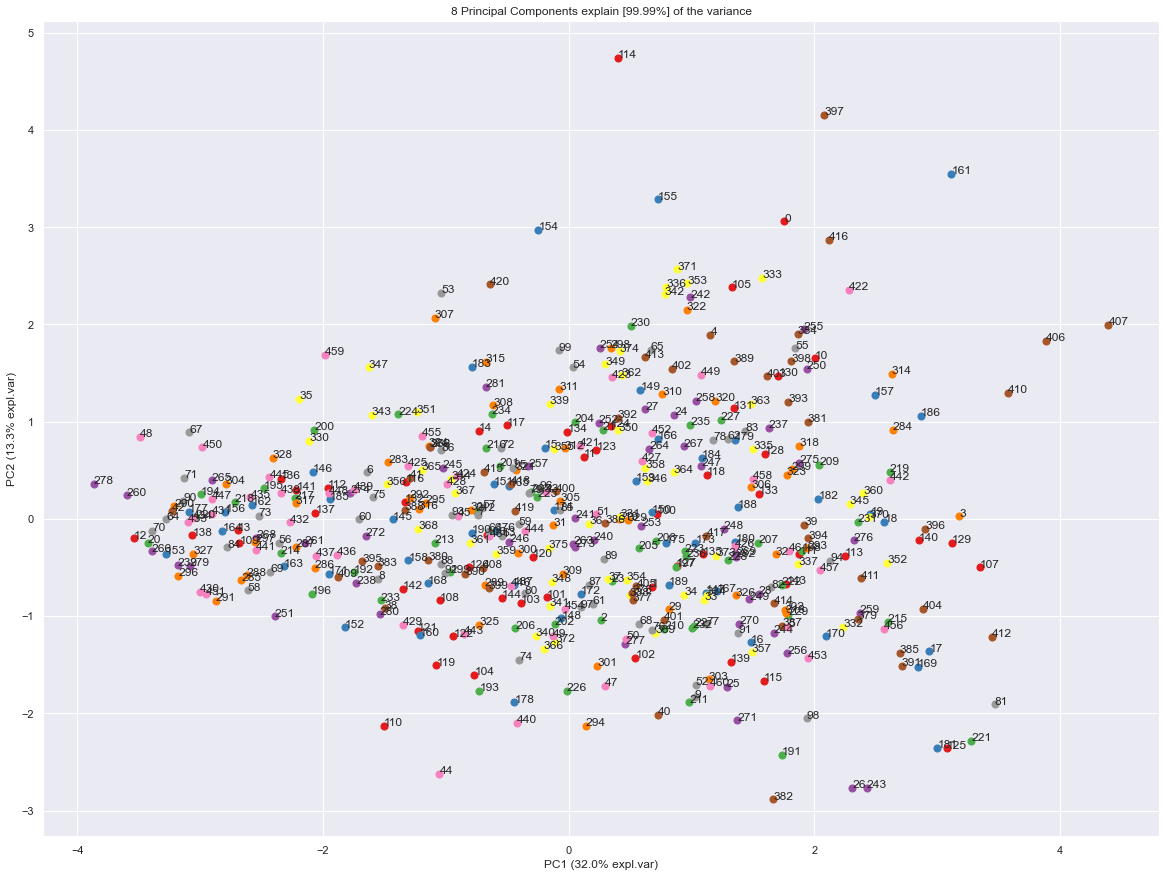

In [15]:
model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

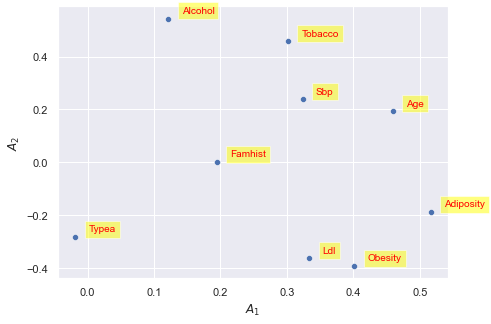

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

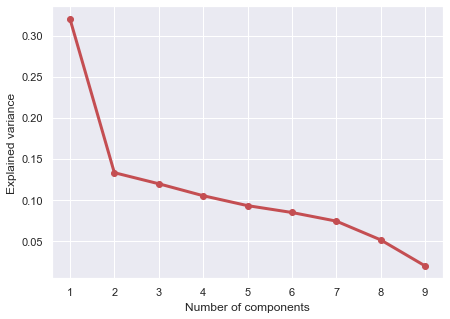

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

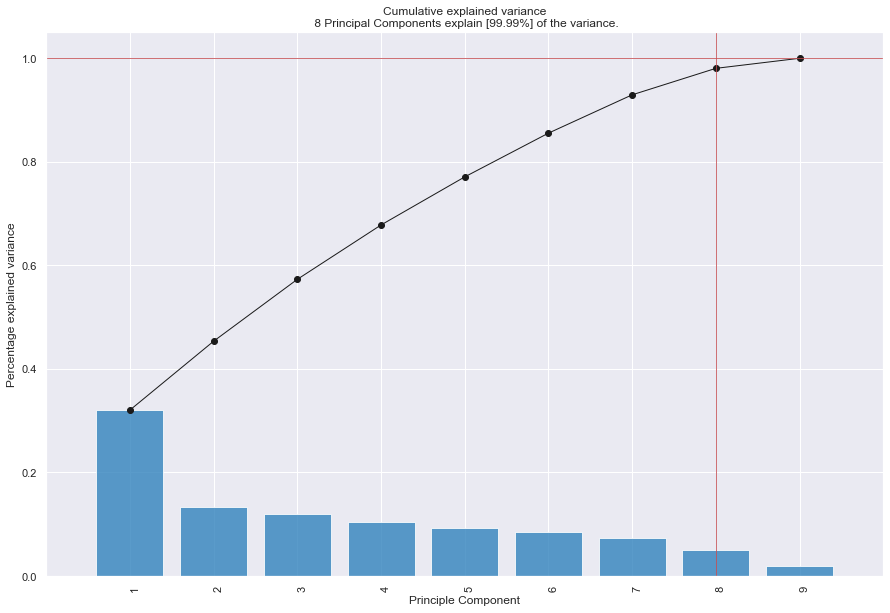

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();